In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_blue_waters_posix_combined = pd.read_csv(r"../data/blue_waters_posix_with_paths_no_negative_outliers.csv")

### Drop time columns and bandwidth except for POSIX_TOTAL_TIME

In [3]:
df_blue_waters_posix_no_time = df_blue_waters_posix_combined.drop(['POSIX_F_READ_TIME','POSIX_F_WRITE_TIME','POSIX_F_META_TIME',
                                                                    'POSIX_F_MAX_READ_TIME','POSIX_F_MAX_WRITE_TIME',
                                                                    'POSIX_F_FASTEST_RANK_TIME','POSIX_F_SLOWEST_RANK_TIME',
                                                                    'bandwidth','start_time_sec','end_time_sec'],axis=1)

In [4]:
df_blue_waters_posix_no_time.head()

POSIX_OPENS  POSIX_FILENOS  POSIX_DUPS  POSIX_READS  POSIX_WRITES  \
0         1280          -1281       -1281         1807             0   
1       168420          -5232       -5232      7505724       5401751   
2        62567          -1477       -1477      2300215        441912   
3         2366          -2367       -2367         3342             0   
4         8709           -288        -288      1521073       6331589   

   POSIX_SEEKS  POSIX_STATS  POSIX_MMAPS  POSIX_FSYNCS  POSIX_RENAME_SOURCES  \
0            0         2561            0             0                 -1281   
1     11345341       394840            0             1                 -5232   
2      1214829       280660            0             1                 -1477   
3            0         4733            0             0                 -2367   
4      2013343        28430            0             0                  -288   

   ...  WRITE_4M_10M  WRITE_10M_100M  WRITE_100M_1G  WRITE_1G_PLUS  rank  \
0  ...             0               0              0              0   184   
1  ...             0               0              0              0     0   
2  ...             0               0              0              0    -1   
3  ...             0               0              0              0   127   
4  ...             0               0              0              0    -1   

   POSIX_TOTAL_TIME  nprocs                           exe  lustre  \
0          0.970498     213                     ./Hsigma        1   
1        147.540409      80                        ./SpEC       1   
2         24.994056      48                        ./SpEC       1   
3          0.487127     394                     ./Hsigma        1   
4      14389.735087     256  CCTM_v52_Linux2_x86_64intel        1   

                                                path  
0  /hpcwork/noco0056/io_transfer_learning/data/bl...  
1  /hpcwork/noco0056/io_transfer_learning/data/bl...  
2  /hpcwork/noco0056/io_transfer_learning/data/bl...  
3  /hpcwork/noco0056/io_transfer_learning/data/bl...  
4  /hpcwork/noco0056/io_transfer_learning/data/bl...  

[5 rows x 93 columns]

In [5]:
df_blue_waters_posix_no_time.to_csv(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time.csv", index=False)

In [6]:
df_blue_waters_posix_no_time.shape

(820701, 93)

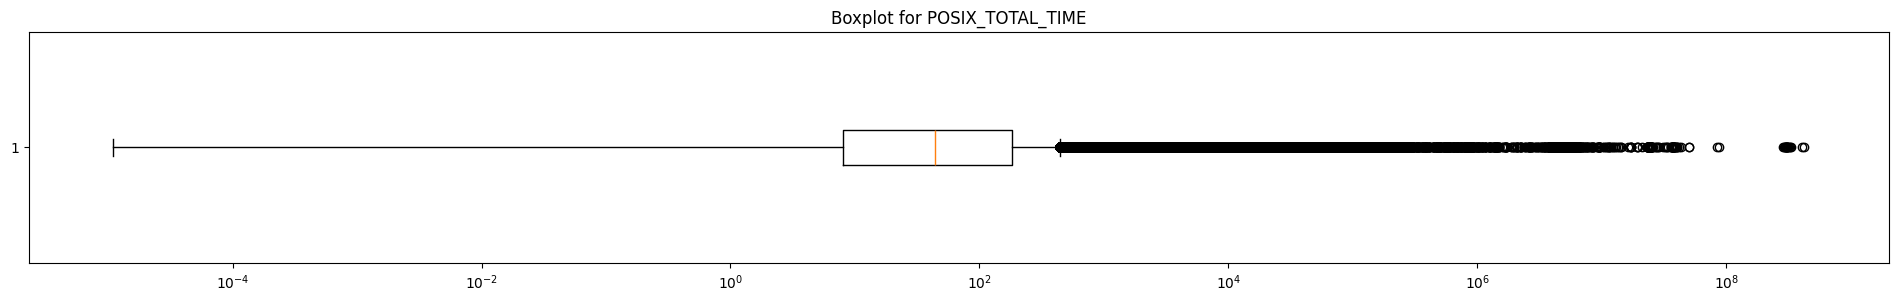

In [7]:
fig, ax = plt.subplots(figsize=(24, 3))
plt.title("Boxplot for POSIX_TOTAL_TIME")
ax.boxplot(df_blue_waters_posix_no_time.POSIX_TOTAL_TIME, vert=False)
ax.set_xscale("log")

In [8]:
POSIX_TOTAL_TIME_q1 = df_blue_waters_posix_no_time.POSIX_TOTAL_TIME.quantile(0.25)
POSIX_TOTAL_TIME_q3 = df_blue_waters_posix_no_time.POSIX_TOTAL_TIME.quantile(0.75)
POSIX_TOTAL_TIME_iqr = POSIX_TOTAL_TIME_q3 - POSIX_TOTAL_TIME_q1
POSIX_TOTAL_TIME_iqr

np.float64(174.18061327934265)

In [9]:
POSIX_TOTAL_TIME_q1 - 1.5 * POSIX_TOTAL_TIME_iqr

np.float64(-253.31888258457184)

In [10]:
POSIX_TOTAL_TIME_q3 + 1.5 * POSIX_TOTAL_TIME_iqr

np.float64(443.40357053279877)

In [11]:
filter = (df_blue_waters_posix_no_time.POSIX_TOTAL_TIME >= POSIX_TOTAL_TIME_q1 - 1.5 * POSIX_TOTAL_TIME_iqr) & (df_blue_waters_posix_no_time.POSIX_TOTAL_TIME <= POSIX_TOTAL_TIME_q3 + 1.5 * POSIX_TOTAL_TIME_iqr)

POSIX_TOTAL_TIME_outliers = df_blue_waters_posix_no_time.loc[(filter)==False]
POSIX_TOTAL_TIME_outliers

POSIX_OPENS  POSIX_FILENOS  POSIX_DUPS  POSIX_READS  POSIX_WRITES  \
4              8709           -288        -288      1521073       6331589   
5              8709           -288        -288      1516465       8334307   
6              8709           -288        -288      1511857      13971437   
10             8709           -288        -288      1521329       6333992   
15             8709           -288        -288      1517489       6333328   
...             ...            ...         ...          ...           ...   
820410        17416           -952        -952      3733374       3261025   
820448        57765           -938        -938      6642037       6467844   
820522        23938          -1095       -1095      3948511       3403261   
820578        15569           -939        -939      3880089       3294112   
820660        49509          -1089       -1089      5679563       5198422   

        POSIX_SEEKS  POSIX_STATS  POSIX_MMAPS  POSIX_FSYNCS  \
4           2013343        28430            0             0   
5           2006943        28430            0             0   
6           2006175        28430            0             0   
10          2008991        28430            0             0   
15          2007199        28430            0             0   
...             ...          ...          ...           ...   
820410      5421311       313533            0             1   
820448      8335537      1108781            0             1   
820522      5431461       370668            0             1   
820578      5765753       324250            0             1   
820660      7210924       959116            0             1   

        POSIX_RENAME_SOURCES  ...  WRITE_4M_10M  WRITE_10M_100M  \
4                       -288  ...             0               0   
5                       -288  ...             0               0   
6                       -288  ...             0               0   
10                      -288  ...             0               0   
15                      -288  ...             0               0   
...                      ...  ...           ...             ...   
820410                  -952  ...             0               0   
820448                  -938  ...             0               0   
820522                 -1095  ...             0               0   
820578                  -939  ...             0               0   
820660                 -1089  ...             0               0   

        WRITE_100M_1G  WRITE_1G_PLUS  rank  POSIX_TOTAL_TIME  nprocs  \
4                   0              0    -1      14389.735087     256   
5                   0              0    -1      14340.456718     256   
6                   0              0    -1      15207.986212     256   
10                  0              0    -1      14634.802894     256   
15                  0              0    -1      15488.418552     256   
...               ...            ...   ...               ...     ...   
820410              0              0    -1        612.559369      48   
820448              0              0     0        525.295508      48   
820522              0              0    -1       1520.894566      48   
820578              0              0    -1        670.240346      48   
820660              0              0     0        473.577674      48   

                                 exe  lustre  \
4       CCTM_v52_Linux2_x86_64intel        1   
5       CCTM_v52_Linux2_x86_64intel        1   
6       CCTM_v52_Linux2_x86_64intel        1   
10      CCTM_v52_Linux2_x86_64intel        1   
15      CCTM_v52_Linux2_x86_64intel        1   
...                              ...     ...   
820410                        ./SpEC       1   
820448                        ./SpEC       1   
820522                        ./SpEC       1   
820578                        ./SpEC       1   
820660                        ./SpEC       1   

                                                     path  
4       /hpcwork/no

In [12]:
df_blue_waters_posix_no_time_no_outliers = df_blue_waters_posix_no_time.loc[(filter)==True]
df_blue_waters_posix_no_time_no_outliers

POSIX_OPENS  POSIX_FILENOS  POSIX_DUPS  POSIX_READS  POSIX_WRITES  \
0              1280          -1281       -1281         1807             0   
1            168420          -5232       -5232      7505724       5401751   
2             62567          -1477       -1477      2300215        441912   
3              2366          -2367       -2367         3342             0   
7            194995          -2560       -2560     10229035       2168343   
...             ...            ...         ...          ...           ...   
820696        27899           -706        -706       824117        136902   
820697        12571          -1000       -1000       781645        355445   
820698          244            -77         -77         3960             5   
820699         9927           -890        -890      3640566       3018272   
820700        22807          -1621       -1621      4213438       3259112   

        POSIX_SEEKS  POSIX_STATS  POSIX_MMAPS  POSIX_FSYNCS  \
0                 0         2561            0             0   
1          11345341       394840            0             1   
2           1214829       280660            0             1   
3                 0         4733            0             0   
7           4553213       888833            0             1   
...             ...          ...          ...           ...   
820696       632480        70722            0             1   
820697       653876        80989            0             1   
820698         2645          499            0             0   
820699      5706358       176916            0             1   
820700      5938277       374535            0             1   

        POSIX_RENAME_SOURCES  ...  WRITE_4M_10M  WRITE_10M_100M  \
0                      -1281  ...             0               0   
1                      -5232  ...             0               0   
2                      -1477  ...             0               0   
3                      -2367  ...             0               0   
7                      -2560  ...             0               0   
...                      ...  ...           ...             ...   
820696                  -706  ...             0               0   
820697                 -1000  ...             0               0   
820698                   -77  ...             0               0   
820699                  -890  ...             0               0   
820700                 -1621  ...             0               0   

        WRITE_100M_1G  WRITE_1G_PLUS  rank  POSIX_TOTAL_TIME  nprocs  \
0                   0              0   184          0.970498     213   
1                   0              0     0        147.540409      80   
2                   0              0    -1         24.994056      48   
3                   0              0   127          0.487127     394   
7                   0              0     0        105.039295      32   
...               ...            ...   ...               ...     ...   
820696              0              0    -1         36.350149      48   
820697              0              0    -1         25.483536      48   
820698              0              0    -1          0.289781       1   
820699              0              0     0         74.705777      48   
820700              0              0     0         99.175484      80   

                                                      exe  lustre  \
0                                               ./Hsigma        1   
1                                                  ./SpEC       1   
2                                                  ./SpEC       1   
3                                               ./Hsigma        1   
7                                                  ./SpEC       1   
...                                                   ...     ...   
820696                                             ./SpEC       1   
820697                                             ./SpEC       1   
820698  ApplyObservers -domaininput

<Axes: title={'center': 'IQR'}, xlabel='POSIX_TOTAL_TIME'>

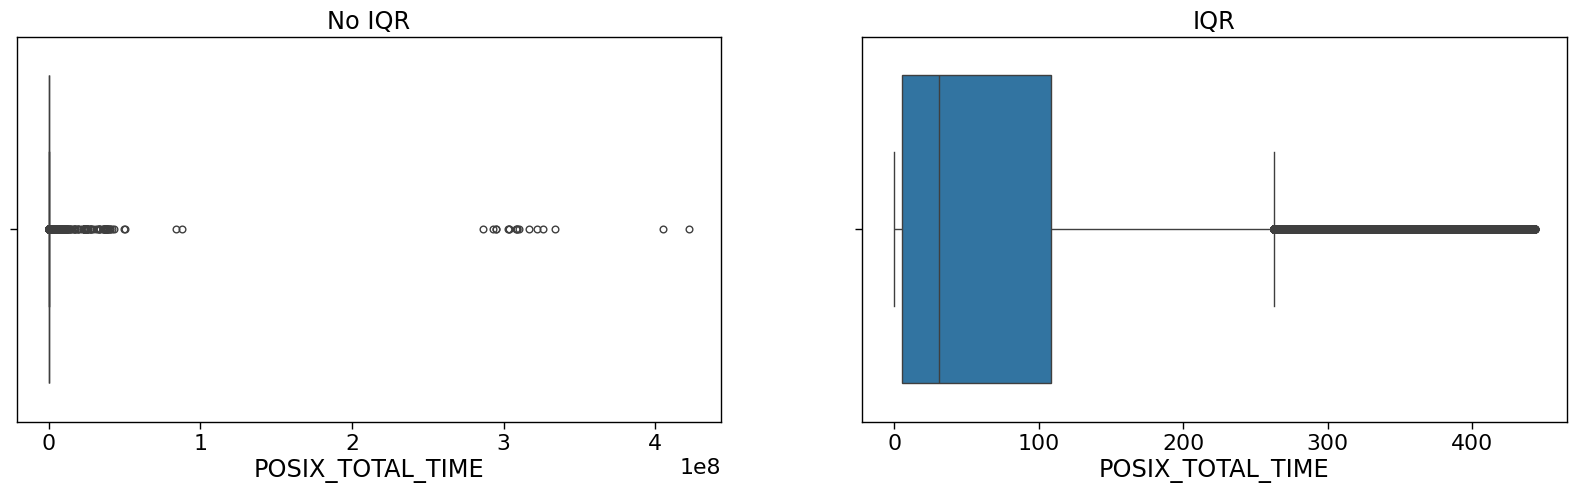

In [13]:
sns.set_context("paper", font_scale=1.8)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axs[0].set_title("No IQR")
sns.boxplot(x=df_blue_waters_posix_no_time.POSIX_TOTAL_TIME,ax=axs[0])
axs[1].set_title("IQR")
sns.boxplot(x=df_blue_waters_posix_no_time_no_outliers.POSIX_TOTAL_TIME,ax=axs[1])

In [14]:
df_blue_waters_posix_no_time_no_outliers.to_csv(r"../data/blue_waters_posix_with_paths_no_outliers_no_time.csv", index=False)

In [15]:
df_blue_waters_posix_no_negative_outliers_no_time = pd.read_csv(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time.csv")

In [16]:
len(df_blue_waters_posix_no_time_no_outliers)

707276

In [17]:
len(df_blue_waters_posix_no_negative_outliers_no_time)

820701